In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix
from ldpc import BpDecoder, BpOsdDecoder
import ldpc.code_util

def simulate_BpOsd_decoder_performance(H, L, m, stabilizer_shape, num_trials=1000, error_range=(0.01, 0.4), num_points=50, DECODER='BpOsdDecoder', bp_method="minimum_sum", osd_method="OSD_0", osd_order=0, bp_max_iter=0, ms_scaling_factor=0.0):
    n = H * L
    if bp_max_iter == 0:
        bp_max_iter = n  # Default maximum number of iterations for BP decoder
    condition_indices = get_condition_indices(stabilizer_shape)
    H_matrix = generate_parity_check_matrix(H, L, m, condition_indices)
    codeword = np.zeros((H_matrix.shape[1],), dtype=int) # all zeros codeword

    error_rates = np.linspace(error_range[0], error_range[1], num_points).astype(float)
    decoding_success_rates_classical = []
    logical_error_rates_classical = []
    decoding_failure_rates_classical = []
    decoding_success_rates_quantum = []
    logical_error_rates_quantum = []

    for error_rate in error_rates:
        logical_errors_classical = 0
        decoding_successes_classical = 0
        decoding_failures_classical = 0

        logical_errors_quantum = 0
        decoding_successes_quantum = 0

        if DECODER == 'BpOsdDecoder':
            bpd = BpOsdDecoder(
                H_matrix, # the parity check matrix
                error_rate=float(error_rate), # physical error rate for the BP decoder
                max_iter=bp_max_iter, # the maximum number of iterations for BP
                bp_method=bp_method, # 'minimum_sum' or 'sum_product'
                ms_scaling_factor=ms_scaling_factor, # min sum scaling factor. If set to zero the variable scaling factor method is used
                osd_method=osd_method,  # 'OSD_0', 'OSD_CS', 'OSD_E'
                osd_order=osd_order # order of the OSD method
            )

        elif DECODER == 'BpDecoder':
            bpd = BpDecoder(
                H_matrix, # the parity check matrix
                error_rate=float(error_rate), # physical error rate for the BP decoder
                max_iter=bp_max_iter, # the maximum number of iterations for BP
                bp_method=bp_method, # 'minimum_sum' or 'sum_product'
                ms_scaling_factor=ms_scaling_factor # min sum scaling factor. If set to zero the variable scaling factor method is used
            )

        for _ in range(num_trials):
            error = (np.random.rand(len(codeword)) < error_rate).astype(int)
            received = (codeword + error) % 2
            syndrome = np.mod(H_matrix @ received, 2)
            expected_error = bpd.decode(syndrome)
            residual_error = (expected_error + error) % 2
            check_syndrome = np.mod(H_matrix @ expected_error, 2)


            # classical code decoding check
            if np.array_equal(check_syndrome, syndrome):
                if np.array_equal(expected_error, error):
                    decoding_successes_classical += 1
                else:
                    logical_errors_classical += 1
            else:
                # no case for BP+OSD decoder
                # Only BP decoder can fail to decode (He != syndrome)
                decoding_failures_classical += 1

            # quantum code decoding check
            if isinstance(DECODER, BPDecoder):
                if not DECODER.converge:
                    logical_errors_quantum += 1
            
            if np.any(L @ residual_error % 2):
                logical_errors_quantum += 1

        decoding_success_rates_classical.append(decoding_successes_classical / num_trials)
        decoding_failure_rates_classical.append(decoding_failures_classical / num_trials)
        logical_error_rates_classical.append(logical_errors_classical / num_trials)
        decoding_success_rates_quantum.append(decoding_successes_quantum / num_trials)
        logical_error_rates_quantum.append(logical_errors_quantum / num_trials)

    return error_rates, decoding_success_rates_classical, logical_error_rates_classical, decoding_failure_rates_classical, decoding_success_rates_quantum, logical_error_rates_quantum


In [73]:
import numpy as np
import ldpc.codes


stabilizer_shape = np.array([[0, 1, 0],
                             [0, 1, 0],
                             [1, 0, 1]])



H = 8
L = 17
m = 3



error_rates_bp, decoding_success_rates_bp_classical, logical_error_rates_bp_classical, decoding_failure_rates_bp_classical, decoding_success_rates_bp_quantum, logical_error_rates_bp_quantum = simulate_BpOsd_decoder_performance(
    H, L, m, stabilizer_shape, num_trials=1000, error_range=(0.01, 0.4), num_points=50, DECODER="BpDecoder", bp_method="minimum_sum"
)

error_rates_osd0, decoding_success_rates_osd_0_classical, logical_error_rates_osd_0_classical, decoding_failure_rates_osd_0_classical, decoding_success_rates_osd_0_quantum, logical_error_rates_osd_0_quantum = simulate_BpOsd_decoder_performance(
    H, L, m, stabilizer_shape, num_trials=1000, error_range=(0.01, 0.4), num_points=50, DECODER="BpOsdDecoder", bp_method="minimum_sum", osd_method="OSD_0", osd_order=0
)

# OSD higher order
error_rates_osd_cs, decoding_success_rates_osd_cs_classical, logical_error_rates_osd_cs_classical, decoding_failure_rates_osd_cs_classical, decoding_success_rates_osd_cs_quantum, logical_error_rates_osd_cs_quantum = simulate_BpOsd_decoder_performance(
    H, L, m, stabilizer_shape, num_trials=1000, error_range=(0.01, 0.4), num_points=50, DECODER="BpOsdDecoder", bp_method="minimum_sum", osd_method="OSD_CS", osd_order=40
)



Stabilizer shape:
[[0 1 0]
 [0 1 0]
 [1 0 1]]


NameError: name 'BPDecoder' is not defined

If decoding failure rates of OSD are all zero: False
If decoding failure rates of OSD CS are all zero: True
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


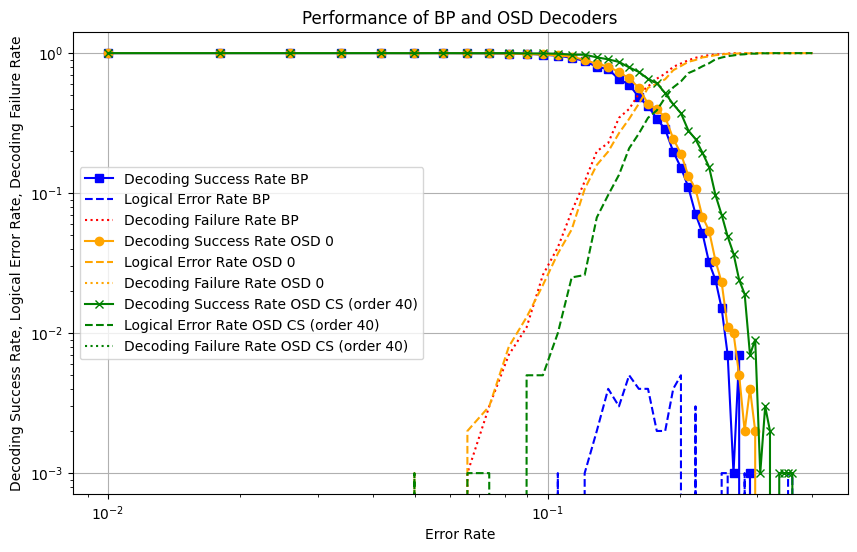

In [68]:
# Plotting the results (only success rates)
plt.figure(figsize=(10, 6))
plt.plot(error_rates_bp, decoding_success_rates_bp, label='Decoding Success Rate BP', marker='s', color='blue')
plt.plot(error_rates_bp, logical_error_rates_bp, label='Logical Error Rate BP', linestyle='--', color='blue')
plt.plot(error_rates_bp, decoding_failure_rates_bp, label='Decoding Failure Rate BP', linestyle=':', color='blue')

plt.plot(error_rates_osd0, decoding_success_rates_osd_0, label='Decoding Success Rate OSD 0', marker='o', color='orange')
plt.plot(error_rates_osd0, logical_error_rates_osd_0, label='Logical Error Rate OSD 0', linestyle='--', color='orange')
plt.plot(error_rates_osd0, decoding_failure_rates_osd_0, label='Decoding Failure Rate OSD 0', linestyle=':', color='orange')

plt.plot(error_rates_osd_cs, decoding_success_rates_osd_cs, label='Decoding Success Rate OSD CS (order 40)', marker='x', color='green')
plt.plot(error_rates_osd_cs, logical_error_rates_osd_cs, label='Logical Error Rate OSD CS (order 40)', linestyle='--', color='green')
plt.plot(error_rates_osd_cs, decoding_failure_rates_osd_cs, label='Decoding Failure Rate OSD CS (order 40)', linestyle=':', color='green')

plt.plot(error_rates_bp, decoding_success_rates_bp_quantum, label='Decoding Success Rate BP (Quantum)', marker='s', color='blue', linestyle='dotted')
plt.plot(error_rates_bp, logical_error_rates_bp_quantum, label='Logical Error Rate BP (Quantum)', linestyle='--', color='blue', linestyle='dotted')

plt.plot(error_rates_osd0, decoding_success_rates_osd_0_quantum, label='Decoding Success Rate OSD 0 (Quantum)', marker='o', color='orange', linestyle='dotted')
plt.plot(error_rates_osd0, logical_error_rates_osd_0_quantum, label='Logical Error Rate OSD 0 (Quantum)', linestyle='--', color='orange', linestyle='dotted')

plt.plot(error_rates_osd_cs, decoding_success_rates_osd_cs_quantum, label='Decoding Success Rate OSD CS (Quantum)', marker='x', color='green', linestyle='dotted')
plt.plot(error_rates_osd_cs, logical_error_rates_osd_cs_quantum, label='Logical Error Rate OSD CS (Quantum)', linestyle='--', color='green', linestyle='dotted')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Error Rate')
plt.ylabel('Decoding Success Rate, Logical Error Rate, Decoding Failure Rate')
plt.title('Performance of BP and OSD Decoders')
plt.legend()
plt.grid()
plt.show()

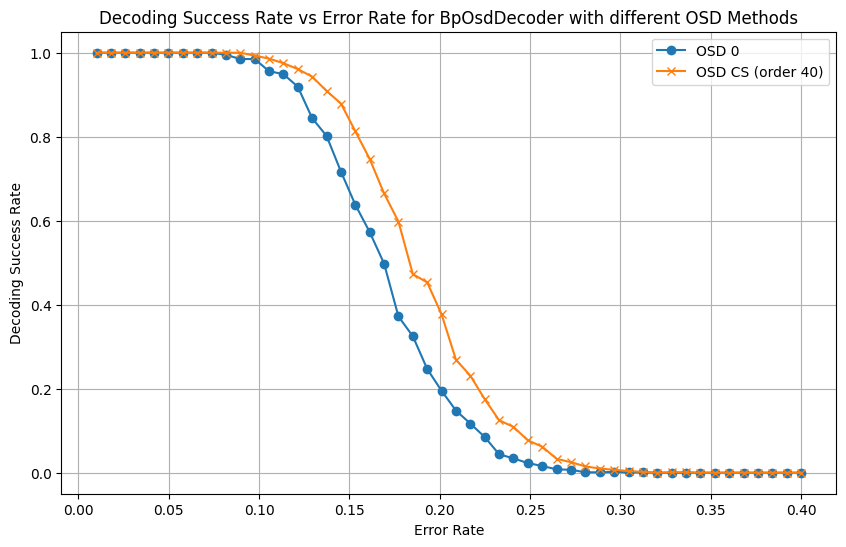

In [5]:
# Plotting the results (only success rates)
plt.figure(figsize=(10, 6))
plt.plot(error_rates, decoding_success_rates_osd_0, label='OSD 0', marker='o')
plt.plot(error_rates_osd, decoding_success_rates_osd_cs, label='OSD CS (order 40)', marker='x')
plt.xlabel('Error Rate')
plt.ylabel('Decoding Success Rate')
plt.title('Decoding Success Rate vs Error Rate for BpOsdDecoder with different OSD Methods')
plt.legend()
plt.grid()
plt.show()

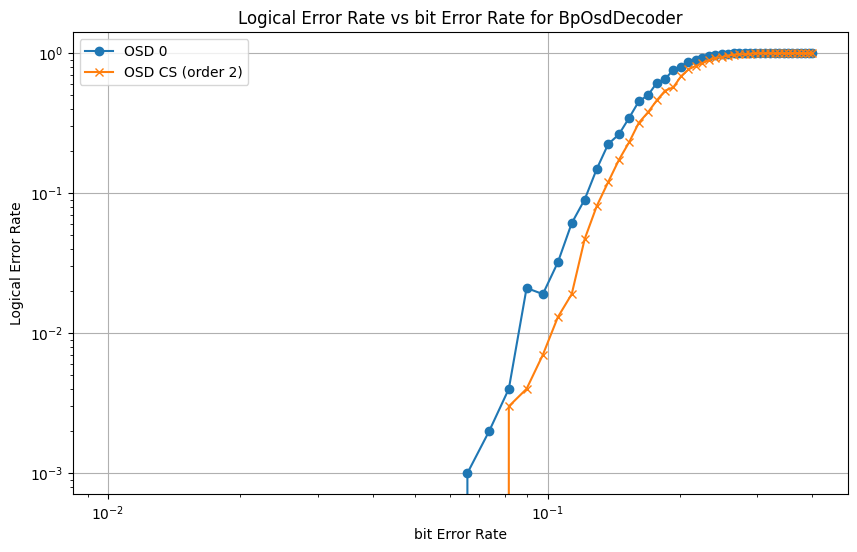

In [10]:
# Plotting the results (only logical-error rates)
plt.figure(figsize=(10, 6))
plt.plot(error_rates, logical_error_rates_osd_0, label='OSD 0', marker='o')
plt.plot(error_rates_osd, logical_error_rates_osd_cs, label='OSD CS (order 2)', marker='x')
plt.xlabel('bit Error Rate')
plt.ylabel('Logical Error Rate')
plt.title('Logical Error Rate vs bit Error Rate for BpOsdDecoder')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

In [3]:
import numpy as np
from itertools import combinations

stabilizer_shape = np.array([[0, 1, 0],
                             [1, 1, 1],
                             [0, 0, 0]])

m = 2

max_iter_list = [4, 1032, 5247, 10000, 11365]
logical_rates_list = []

for max_iter in max_iter_list:
    print(f"Simulating with max_iter = {max_iter}")
    
    # Simulate decoder performance for each shape
    error_rates, success_rates, logical_rates, failure_rates = simulate_BpOsd_decoder_performance(
        H=3,
        L=10,
        m=m,
        stabilizer_shape=stabilizer_shape,
        num_trials=10000,
        error_range=(0.001, 0.05),
        num_points=12,
        bp_max_iter=max_iter,
        bp_method="minimum_sum",
        osd_method="OSD_CS",
        osd_order=10,
        ms_scaling_factor=0.625
    )
    print(f"Max Iter: {max_iter}, Logical Rates: {logical_rates}")
    logical_rates_list.append(logical_rates)



Simulating with max_iter = 4
Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Max Iter: 4, Logical Rates: [0.0, 0.0, 0.0, 0.0, 0.0004, 0.0001, 0.0007, 0.0004, 0.0008, 0.0022, 0.0033, 0.0039]
Simulating with max_iter = 1032
Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Max Iter: 1032, Logical Rates: [0.0, 0.0, 0.0, 0.0, 0.0001, 0.0001, 0.0001, 0.0009, 0.0015, 0.0029, 0.0031, 0.0047]
Simulating with max_iter = 5247
Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Max Iter: 5247, Logical Rates: [0.0, 0.0, 0.0001, 0.0001, 0.0003, 0.0004, 0.0003, 0.0009, 0.0009, 0.0013, 0.0029, 0.0043]
Simulating with max_iter = 10000
Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Max Iter: 10000, Logical Rates: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0002, 0.0003, 0.001, 0.0015, 0.0013, 0.0022, 0.0046]
Simulating with max_iter = 11365
Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Max Iter: 11365, Logical Rates: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0003, 0.0001, 0.0009, 0.0008, 0.0017, 0.0037, 0.0044]


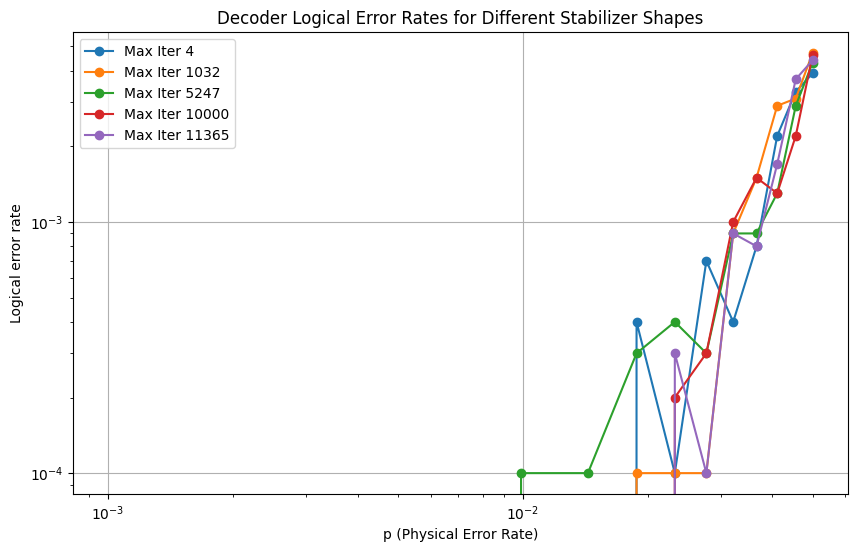

In [5]:
plt.figure(figsize=(10, 6))
for max_iter, logical_rates in zip(max_iter_list, logical_rates_list):
    plt.plot(error_rates, logical_rates, label=f'Max Iter {max_iter}', marker='o')
    plt.legend([f'Max Iter {mi}' for mi in max_iter_list])
plt.xlabel('p (Physical Error Rate)')
plt.ylabel('Logical error rate')
plt.title('Decoder Logical Error Rates for Different Number of Maximum Iteration')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

# plt.plot(error_rates, logical_rates, label=f'Max Iter {max_iter}', marker='o')